# Salary Prediction

## Problem Statement
"Predict or suggest the Salary of an employee based on experience"

Note:
This is just for learning and understand the Linear Regression. This is not applicabale in real world as salary of employee is based on multiple factor such as position, experience, education, skills, performance and many more.

## Import Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

## Load Data

In [32]:
data = pd.read_csv('/content/Salary.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


## Understanding Data

In [33]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [34]:
data.shape

(35, 2)

In [35]:
data.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


It is understood that our data have 35 records, with two columns experience in years and Salary.

## Data Wrangling

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [37]:
data.isna().sum()

,0
YearsExperience,0
Salary,0


No value is null

In [38]:
data.isnull().any()

,0
YearsExperience,False
Salary,False


## EDA Via Visualizations

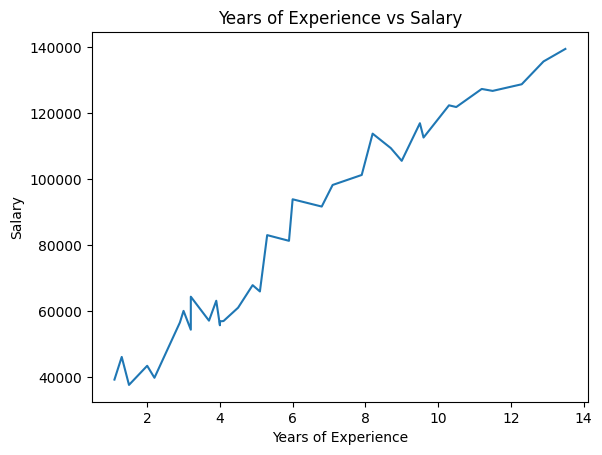

In [39]:
plt.plot(data['YearsExperience'], data['Salary'])
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

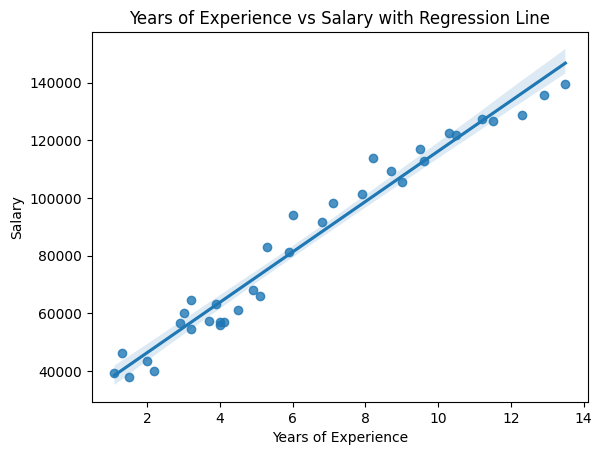

In [40]:
# Years of Experience vs Salary with Regression Line
sns.regplot(x='YearsExperience', y='Salary', data=data)
plt.title('Years of Experience vs Salary with Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Understanding Data and Selection of Model

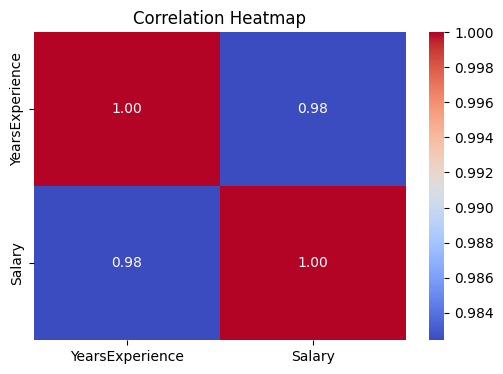

In [41]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Split Data

In [42]:
x = data.drop('Salary', axis=1)
y = data['Salary']

In [43]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

## Model Training

In [44]:
mdl = LinearRegression()
mdl.fit(Xtrain,  ytrain)

LinearRegression()

## Prediction

In [45]:
pred_y = mdl.predict(Xtest)

In [46]:
print("Predict Values: \n", pred_y)

Predict Values: 
 [110576.91706292  64251.57268882 103713.90308157  89987.87511888
  71114.58667017 119155.68453961  80551.23089452]


In [47]:
print('Actual Value: \n', ytest)

Actual Value: 
 26    116969
13     57081
24    109431
21     98273
15     67938
29    121872
19     93940
Name: Salary, dtype: int64


In [52]:
Xtest

,YearsExperience
26,9.5
13,4.1
24,8.7
21,7.1
15,4.9
29,10.5
19,6.0


In [60]:
to_test = np.array([2])
to_test = to_test.reshape(-1,1)
py = mdl.predict(to_test)
py

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([46236.16098778])

## Evaluation of Model

In [50]:
# Evaluate the model
mse = mean_squared_error(ytest, pred_y)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, pred_y)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 55761791.306260146
Root Mean Squared Error: 7467.381824057221
R-squared: 0.8914234140042779


In [51]:
print(mdl.score(Xtest, ytest))

0.8914234140042779
